In [1]:
import os 
import numpy as np 
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
base_path = './data'
folders = ['dataA','dataB','dataC','dataD','dataE']

images = []
masks = []

In [3]:
for folder in folders:
    rgb_path = os.path.join(base_path, folder, 'CameraRGB')
    seg_path = os.path.join(base_path,folder,'CameraSeg')

    for filename in os.listdir(rgb_path):
        img = cv2.imread(os.path.join(rgb_path,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        mask = cv2.imread(os.path.join(seg_path,filename), cv2.IMREAD_GRAYSCALE)

        images.append(img)
        masks.append(mask)

print(f"Loaded {len(images)} images and {len(masks)} masks.")

Loaded 5000 images and 5000 masks.


In [4]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

images_resized = np.array([cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) for img in images])
masks_resized = np.array([cv2.resize(mask,(IMG_HEIGHT, IMG_WIDTH)) for mask in masks])

In [5]:
images_resized = images_resized / 255.0

In [6]:
print("Images and masks resized and normalized.")

Images and masks resized and normalized.


In [7]:
X_train, X_temp, y_train, y_temp = train_test_split(images_resized,masks_resized, test_size=0.3,random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33,random_state=42) # 0.33 x 0.3 = ~10%

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 3500
Validation samples: 1005
Testing samples: 495


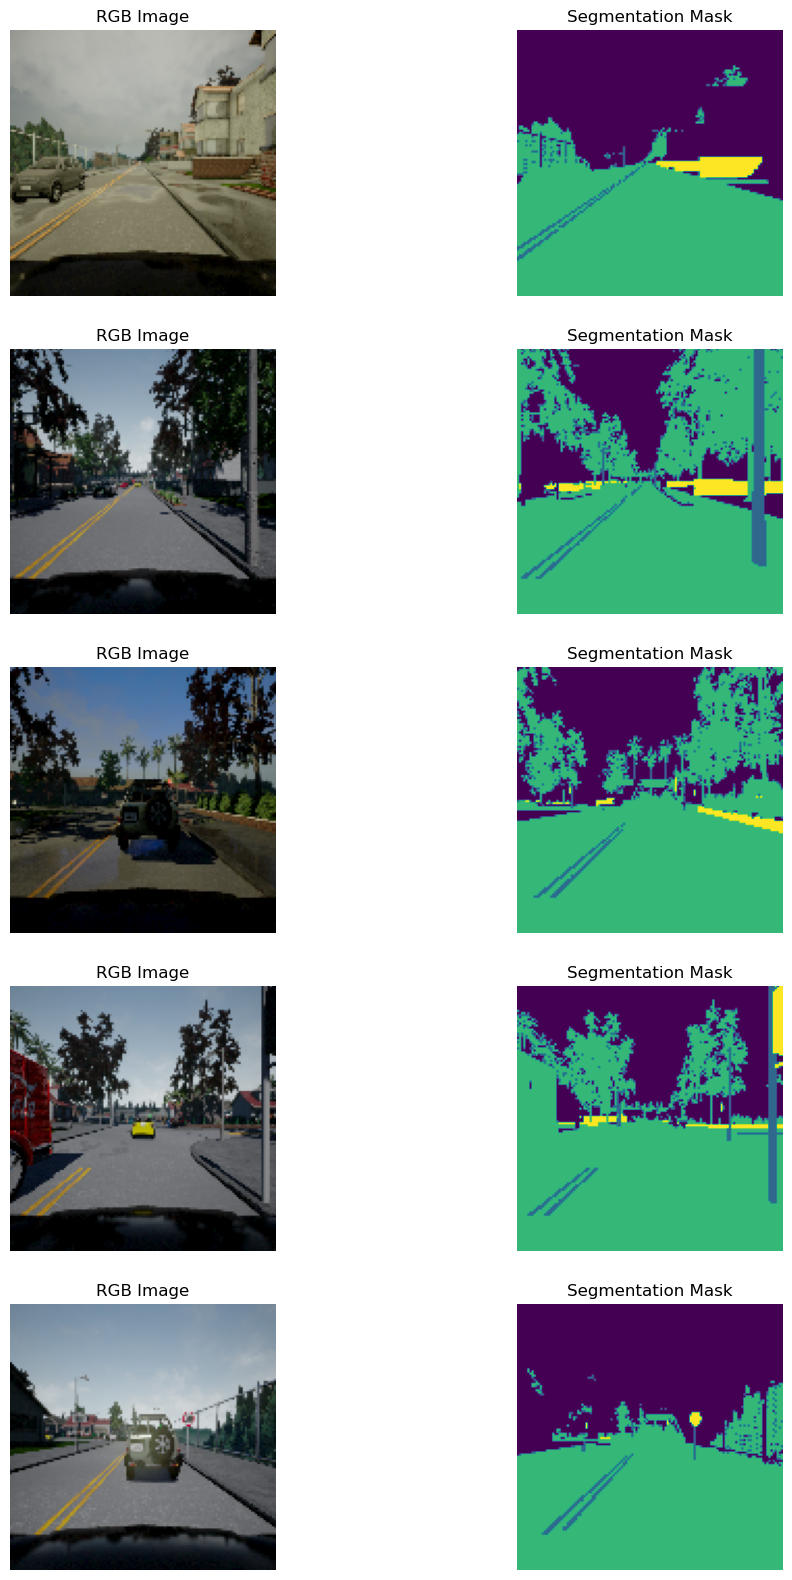

In [8]:
from matplotlib.colors import ListedColormap

# Define a custom colormap for segmentation masks
custom_cmap = ListedColormap(['black', 'yellow', 'green', 'red'] )

def visualize_data(images,masks, num_samples=3):
    plt.figure(figsize=(12,num_samples*4))
    for i in range(num_samples):
        plt.subplot(num_samples,2,2*i+1)
        plt.imshow(images[i])
        plt.title('RGB Image')
        plt.axis('off')

        plt.subplot(num_samples,2,2*i+2)
        plt.imshow(masks[i],cmap='viridis')
        plt.title('Segmentation Mask')
        plt.axis('off')
    plt.show()

visualize_data(X_train,y_train,num_samples=5)

In [9]:
import pickle 

with open('data_splits_128.pkl','wb') as f:
    pickle.dump((X_train,X_val,X_test,y_train,y_val,y_test),f)

print("Data splits saved using pickle!")

Data splits saved using pickle!


In [11]:
IMG_HEIGHT, IMG_WIDTH = 256, 256

# Resize and normalize images and masks
images_resized = np.array([cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH)) for img in images]) / 255.0
masks_resized = np.array([cv2.resize(mask, (IMG_HEIGHT, IMG_WIDTH)) for mask in masks])

print("Images and masks resized and normalized.")


In [12]:
# Split data into training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(
    images_resized, masks_resized, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.33, random_state=42  # 0.33 x 0.3 = ~10%
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Testing samples: {len(X_test)}")

# Save the data splits to a pickle file
with open('data_splits_256.pkl', 'wb') as f:
    pickle.dump((X_train, X_val, X_test, y_train, y_val, y_test), f)

print("Data splits saved using pickle!")

Training samples: 3500
Validation samples: 1005
Testing samples: 495
Data splits saved using pickle!
